## Initializing Dataset

In [548]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.cluster import KMeans

In [510]:
df = pd.read_csv("diabetic_data.csv")

## PreProcessing

In [511]:
df.head(25)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),?,2,1,2,3,...,No,Steady,No,No,No,No,No,No,Yes,>30
6,55842,84259809,Caucasian,Male,[60-70),?,3,1,2,4,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,63768,114882984,Caucasian,Male,[70-80),?,1,1,7,5,...,No,No,No,No,No,No,No,No,Yes,>30
8,12522,48330783,Caucasian,Female,[80-90),?,2,1,4,13,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,15738,63555939,Caucasian,Female,[90-100),?,3,3,4,12,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [512]:
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [513]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [514]:
# Count each value of target feature(readmitted)
print(df['readmitted'].value_counts()) 

NO     54864
>30    35545
<30    11357
Name: readmitted, dtype: int64


In [515]:
# Replace missing values "?" with NaN
df.replace('?', float('nan'), inplace=True)

# Count the number of missing values in each column
missing_counts = df.isna().sum()
print(missing_counts)

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [516]:
# As we can see weight, payer_code and medical_specialty have the most missing values so we drop them.
df.drop(['weight', 'payer_code', 'medical_specialty'], axis=1, inplace=True)

In [517]:
# Using mode to replace missing values for race attribute
mode_race = df['race'].mode()[0]
df['race'].fillna(mode_race, inplace=True)
print(df['race'].head(25))

0           Caucasian
1           Caucasian
2     AfricanAmerican
3           Caucasian
4           Caucasian
5           Caucasian
6           Caucasian
7           Caucasian
8           Caucasian
9           Caucasian
10    AfricanAmerican
11    AfricanAmerican
12          Caucasian
13          Caucasian
14    AfricanAmerican
15    AfricanAmerican
16    AfricanAmerican
17          Caucasian
18    AfricanAmerican
19          Caucasian
20          Caucasian
21          Caucasian
22    AfricanAmerican
23          Caucasian
24    AfricanAmerican
Name: race, dtype: object


In [518]:
diag_1_mode = df['diag_1'].mode()[0]
diag_2_mode = df['diag_2'].mode()[0]
diag_3_mode = df['diag_3'].mode()[0]

df['diag_1'] = df['diag_1'].fillna(diag_1_mode)
df['diag_2'] = df['diag_2'].fillna(diag_2_mode)
df['diag_3'] = df['diag_3'].fillna(diag_3_mode)
print(df['diag_1'].head())
print("===============================")
print(df['diag_2'].head())
print("===============================")
print(df['diag_3'].head())

0    250.83
1       276
2       648
3         8
4       197
Name: diag_1, dtype: object
0       276
1    250.01
2       250
3    250.43
4       157
Name: diag_2, dtype: object
0    250
1    255
2    V27
3    403
4    250
Name: diag_3, dtype: object


In [519]:
# Gender feature missing values are different with other features 
print('gender before droping', df['gender'][df['gender'] == 'Unknown/Invalid'].count()) 
df = df[df['gender'] != 'Unknown/Invalid']
print('gender after droping', df['gender'][df['gender'] == 'Unknown/Invalid'].count())

gender before droping 3
gender after droping 0


In [520]:
# Checking missing values again
missing_counts = df.isna().sum()
print(missing_counts)

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose                    0
miglitol  

In [521]:
# As we can see the values of age feature are given like [0–10),[10–20),[20–30),... so we need to change them:
replaceDict = {'[0-10)' : 5,
'[10-20)' : 15,
'[20-30)' : 25, 
'[30-40)' : 35, 
'[40-50)' : 45, 
'[50-60)' : 55,
'[60-70)' : 65, 
'[70-80)' : 75,
'[80-90)' : 85,
'[90-100)' : 95}

df['age'] = df['age'].apply(lambda x : replaceDict[x])
print(df['age'].head())

0     5
1    15
2    25
3    35
4    45
Name: age, dtype: int64


In [522]:
# Removing duplicate data
print('Length before removing Duplicates:', len(df))
df.drop_duplicates(['patient_nbr'], keep = 'first', inplace = True)
print('Length after removing Duplicates:', len(df))

Length before removing Duplicates: 101763
Length after removing Duplicates: 71515


In [523]:
# encounter_id and patient_nbr are useless features so we drop them
df.drop(['encounter_id', 'patient_nbr'], axis = 1, inplace = True)

In [524]:
# citoglipton and examide all records have the same value so we drop them.
print("citoglipton: ", df['citoglipton'].value_counts()) 
print("examide: ", df['examide'].value_counts()) 
df = df.drop(['citoglipton', 'examide'], axis = 1)

citoglipton:  No    71515
Name: citoglipton, dtype: int64
examide:  No    71515
Name: examide, dtype: int64


## Feature Engineering and Visualizing

In [525]:
# The diag_1 , diag_2 , diag_3 are categorical features but they have lots unique values
df['diag_1'] = df['diag_1'].apply(lambda x : 'other' if (str(x).find('V') != -1 or str(x).find('E') != -1)  
                                        else ('circulatory' if int(float(x)) in range(390, 460) or int(float(x)) == 785
                                        else     ('respiratory' if int(float(x)) in range(460, 520) or int(float(x)) == 786
                                        else     ('digestive'   if int(float(x)) in range(520, 580) or int(float(x)) == 787
                                        else     ('diabetes'    if int(float(x)) == 250
                                        else     ('injury'      if int(float(x)) in range(800, 1000)
                                        else ('musculoskeletal' if int(float(x)) in range(710, 740)
                                        else ('genitourinary'   if int(float(x)) in range(580, 630) or int(float(x)) == 788
                                        else ('neoplasms'       if int(float(x)) in range(140, 240)
                                        else ('pregnecy'        if int(float(x)) in range(630, 680)
                                        else 'other'))))))))))

df['diag_2'] = df['diag_2'].apply(lambda x : 'other' if (str(x).find('V') != -1 or str(x).find('E') != -1)  
                                        else ('circulatory' if int(float(x)) in range(390, 460) or int(float(x)) == 785
                                        else     ('respiratory' if int(float(x)) in range(460, 520) or int(float(x)) == 786
                                        else     ('digestive'   if int(float(x)) in range(520, 580) or int(float(x)) == 787
                                        else     ('diabetes'    if int(float(x)) == 250
                                        else     ('injury'      if int(float(x)) in range(800, 1000)
                                        else ('musculoskeletal' if int(float(x)) in range(710, 740)
                                        else ('genitourinary'   if int(float(x)) in range(580, 630) or int(float(x)) == 788
                                        else ('neoplasms'       if int(float(x)) in range(140, 240)
                                        else ('pregnecy'        if int(float(x)) in range(630, 680)
                                        else 'other'))))))))))

df['diag_3'] = df['diag_3'].apply(lambda x : 'other' if (str(x).find('V') != -1 or str(x).find('E') != -1)  
                                        else ('circulatory' if int(float(x)) in range(390, 460) or int(float(x)) == 785
                                        else     ('respiratory' if int(float(x)) in range(460, 520) or int(float(x)) == 786
                                        else     ('digestive'   if int(float(x)) in range(520, 580) or int(float(x)) == 787
                                        else     ('diabetes'    if int(float(x)) == 250
                                        else     ('injury'      if int(float(x)) in range(800, 1000)
                                        else ('musculoskeletal' if int(float(x)) in range(710, 740)
                                        else ('genitourinary'   if int(float(x)) in range(580, 630) or int(float(x)) == 788
                                        else ('neoplasms'       if int(float(x)) in range(140, 240)
                                        else ('pregnecy'        if int(float(x)) in range(630, 680)
                                        else 'other'))))))))))

In [526]:
# Replace '>30' / 'NO' with 0 and '<30' with 1 in Redmitted column
df['readmitted'] = df['readmitted'].apply(lambda x : 0 if (x == '>30' or x == 'NO') else 1)

In [527]:
df['discharge_disposition_id'] = df['discharge_disposition_id'].apply(lambda x : 1 if int(x) in [6, 8, 9, 13] 
                                                                           else ( 2 if int(x) in [3, 4, 5, 14, 22, 23, 24]
                                                                           else ( 10 if int(x) in [12, 15, 16, 17]
                                                                           else ( 11 if int(x) in [19, 20, 21]
                                                                           else ( 18 if int(x) in [25, 26] 
                                                                           else int(x) )))))

df = df[~df.discharge_disposition_id.isin([11,13,14,19,20,21])]

In [528]:
df['admission_type_id'] = df['admission_type_id'].apply(lambda x : 1 if int(x) in [2, 7]
                                                            else ( 5 if int(x) in [6, 8]
                                                            else int(x) ))

In [529]:
df['admission_source_id'] = df['admission_source_id'].apply(lambda x : 1 if int(x) in [2, 3]
                                                            else ( 4 if int(x) in [5, 6, 10, 22, 25]
                                                            else ( 9 if int(x) in [15, 17, 20, 21]
                                                            else ( 11 if int(x) in [13, 14]
                                                            else int(x) ))))

In [530]:
df['max_glu_serum'] = df['max_glu_serum'].apply(lambda x : 200 if x == '>200' 
                                                            else ( 300 if x == '>300'                                                          
                                                            else ( 100 if x == 'Norm'
                                                            else  0)))

In [531]:
df['A1Cresult'] = df['A1Cresult'].apply(lambda x : 7 if x == '>7' 
                                                         else (8 if  x == '>8'                                                        
                                                         else ( 5 if x == 'Norm'
                                                         else  0)))

In [532]:
for col in ["metformin", "repaglinide", "nateglinide", "chlorpropamide", "glimepiride", "acetohexamide", "glipizide", "glyburide", "tolbutamide", "pioglitazone", "rosiglitazone", "acarbose", "miglitol", "troglitazone", "tolazamide", "insulin", "glyburide-metformin", "glipizide-metformin", "glimepiride-pioglitazone", "metformin-rosiglitazone", "metformin-pioglitazone"]:
    df[col] = df[col].apply(lambda x : 10 if x == 'Up' 
                                              else ( -10 if x == 'Down'                                                          
                                              else ( 0 if x == 'Steady'
                                              else  -20)))

In [533]:
df['change'] = df['change'].apply(lambda x : 1 if x == 'Ch'
                                                 else -1)

In [534]:
df['diabetesMed'] = df['diabetesMed'].apply(lambda x : -1 if x == 'No'
                                                else 1)

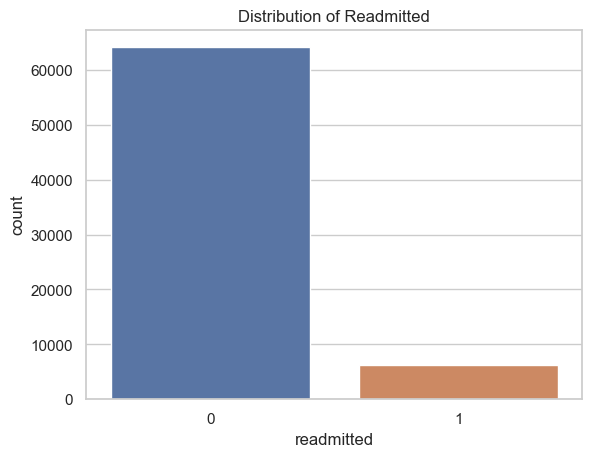

In [535]:
sns.countplot(x='readmitted', data=df)
plt.title('Distribution of Readmitted')
plt.show()

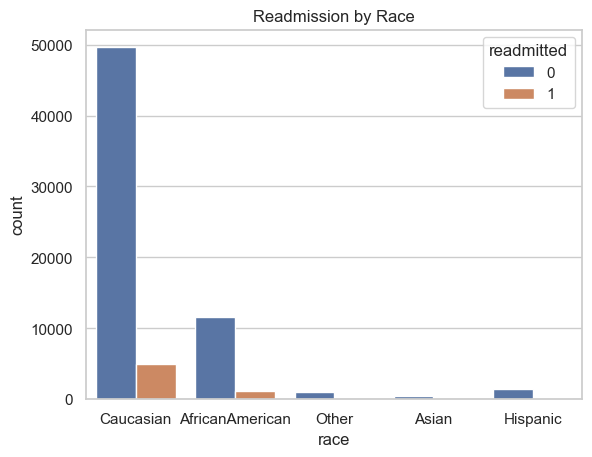

In [536]:
sns.countplot(x='race', hue='readmitted', data=df)
plt.title('Readmission by Race')
plt.show()

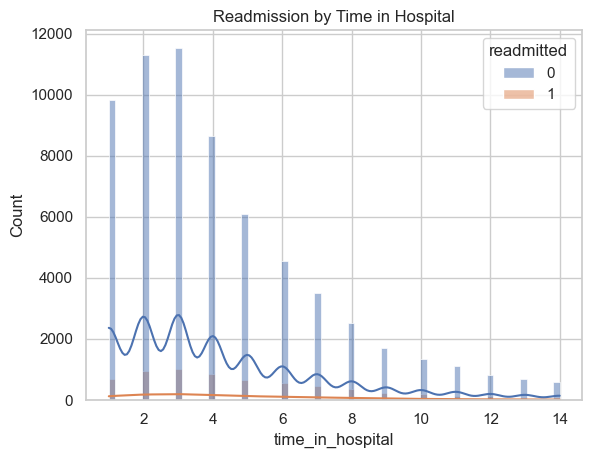

In [537]:
sns.histplot(x='time_in_hospital', hue='readmitted', data=df, kde=True)
plt.title('Readmission by Time in Hospital')
plt.show()

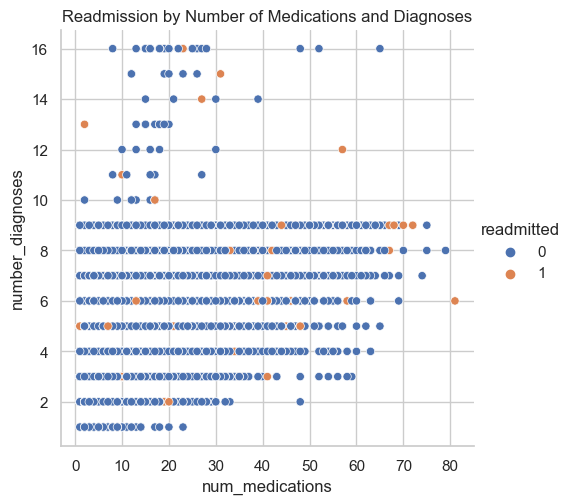

In [538]:
sns.relplot(x='num_medications', y='number_diagnoses', hue='readmitted', data=df)
plt.title('Readmission by Number of Medications and Diagnoses')
plt.show()

In [539]:
df.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,5,5,18,1,1,41,0,1,...,-20,-20,-20,-20,-20,-20,-20,-1,-1,0
1,Caucasian,Female,15,1,1,7,3,59,0,18,...,-20,10,-20,-20,-20,-20,-20,1,1,0
2,AfricanAmerican,Female,25,1,1,7,2,11,5,13,...,-20,-20,-20,-20,-20,-20,-20,-1,1,0
3,Caucasian,Male,35,1,1,7,2,44,1,16,...,-20,10,-20,-20,-20,-20,-20,1,1,0
4,Caucasian,Male,45,1,1,7,1,51,0,8,...,-20,0,-20,-20,-20,-20,-20,1,1,0


## Training model

In [540]:
X = df.drop('readmitted', axis=1)
y = df['readmitted']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [541]:
categorical_columns = df.select_dtypes(include=["object"])
categorical_columns

,race,gender,diag_1,diag_2,diag_3
0,Caucasian,Female,diabetes,other,diabetes
1,Caucasian,Female,other,diabetes,other
2,AfricanAmerican,Female,pregnecy,diabetes,other
3,Caucasian,Male,other,diabetes,circulatory
4,Caucasian,Male,neoplasms,neoplasms,diabetes
...,...,...,...,...,...
101754,Caucasian,Female,digestive,digestive,diabetes
101755,Other,Female,genitourinary,genitourinary,respiratory
101756,Other,Female,injury,genitourinary,circulatory
101758,Caucasian,Female,other,other,other


In [550]:
# select the features and target variable
features = ['race', 'gender', 'age', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide','insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed']
target = 'readmitted'

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

# Get the categorical features
cat_features = ['race', 'gender', 'diag_1', 'diag_2', 'diag_3']

# Create a label encoder object
encoder = LabelEncoder()

# Encode the categorical features in the training and testing data
for feature in cat_features:
    X_train[feature] = encoder.fit_transform(X_train[feature])
    X_test[feature] = encoder.transform(X_test[feature])

# Create a decision tree classifier object
dt = DecisionTreeClassifier(random_state=42)

# Train the model on the training data
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [551]:
# perform 10-fold cross-validation
scores = cross_val_score(dt, X_train, y_train, cv=10)

# print the mean and standard deviation of the scores
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.82 (+/- 0.00)


In [549]:
# select the data
X = df[features]

# create a k-means object with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)

# fit the k-means model to the data
kmeans.fit(X)

# get the cluster labels for each data point
labels = kmeans.labels_

# print the cluster labels
print(labels)

ValueError: could not convert string to float: 'Caucasian'